In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math as mt
from statistics import variance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df = pd.read_excel('drive/MyDrive/dano_data.xlsx')
df.head(10)
df_source = df.copy()

In [3]:
df = df_source.copy()

['Ср.знач = 563484.27 руб.', 'Медиана = 110305.97 руб.', 'Макс.знач = 124.0 млн. руб.\n', 'Мин.знач = 0.0 руб.']


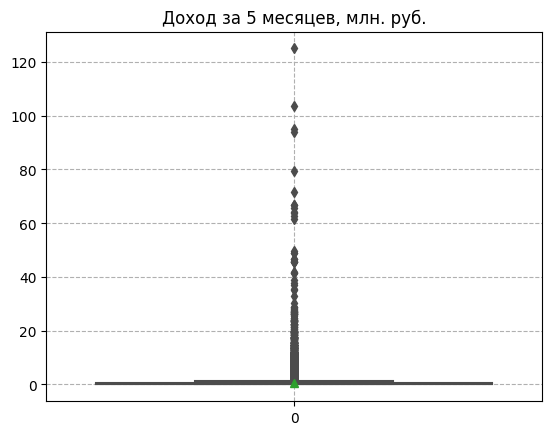

In [4]:
sns.boxplot(data = df_source['in_total_5ms_amt'] / 10**6, color = 'gold', showmeans = True)
plt.title('Доход за 5 месяцев, млн. руб.')
print(['Ср.знач = '+str(df_source['in_total_5ms_amt'].mean().round(2))+' руб.',
            'Медиана = '+str(df_source['in_total_5ms_amt'].median().round(2))+' руб.',
            'Макс.знач = '+str(df_source['in_total_5ms_amt'].max().round(2) // 10**6)+' млн. руб.\n',
            'Мин.знач = '+str(df_source['in_total_5ms_amt'].min().round(2))+' руб.'])
plt.grid(linestyle = '--')
'''
edge = df_source['in_total_5ms_amt'].quantile(0.85)
df['in_total_5ms_amt'] = df_source['in_total_5ms_amt'].transform(lambda x: x if x < edge else edge)
sns.boxplot(data = df['in_total_5ms_amt'] / 10**6, color = 'gold')
plt.title('Обработаны выбросы')
plt.legend(['Ср.знач = '+str(df['in_total_5ms_amt'].mean().round(2))+' руб.',
            'Медиана = '+str(df['in_total_5ms_amt'].median().round(2))+' руб.',
            'Макс.знач = '+str(df['in_total_5ms_amt'].max().round(2) )+' руб.',
            'Мин.знач = '+str(df['in_total_5ms_amt'].min().round(2))+' руб.'])
plt.grid(linestyle = '--')
'''
plt.show()

73712
1 mon     43287
2 mons       37
3 mons       16
5 mons        7
4 mons        4
6 mons        2
Name: trial_type, dtype: int64
[30359, 43287, 66]


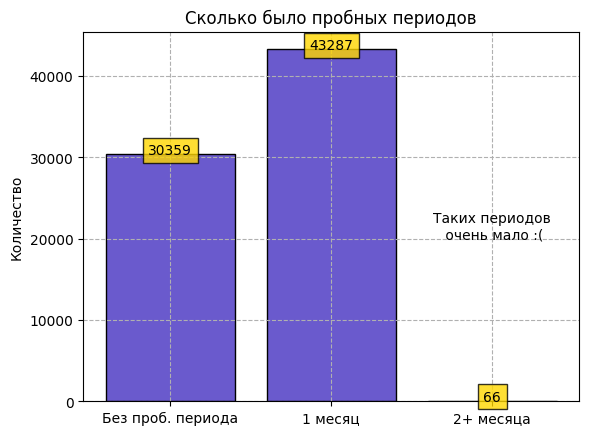

In [5]:
print(df.shape[0])
print(df['trial_type'].value_counts())
height = [df[df['trial_type'].isna()].shape[0], df[df['trial_type'] == '1 mon'].shape[0]]
height += [df.shape[0] - sum(height)]
print(height)
plt.title('Сколько было пробных периодов')
plt.bar(['Без проб. периода', '1 месяц', '2+ месяца'], height, color = 'slateblue', edgecolor = 'black')
plt.ylabel('Количество')
for i in range(len(height)):
    plt.text(i, height[i], height[i], ha = 'center', bbox = dict(facecolor = 'gold', alpha =.8))
plt.text(2, 20000, 'Таких периодов\n очень мало :(', ha = 'center')
plt.grid(linestyle = '--')
plt.show()

In [6]:
df_source['trial_type'].value_counts()

1 mon     43287
2 mons       37
3 mons       16
5 mons        7
4 mons        4
6 mons        2
Name: trial_type, dtype: int64

In [7]:
df_no_active = df[
    (df['dep_account_first_open_dt'].isna()) & (df['cln_account_first_open_dt'].isna()) & (df['pos_account_first_open_dt'].isna()) &
 (df['account_own_flg'] == 0) & (df['subscription_time'] > 0)]
df_no_active.shape

(4148, 66)

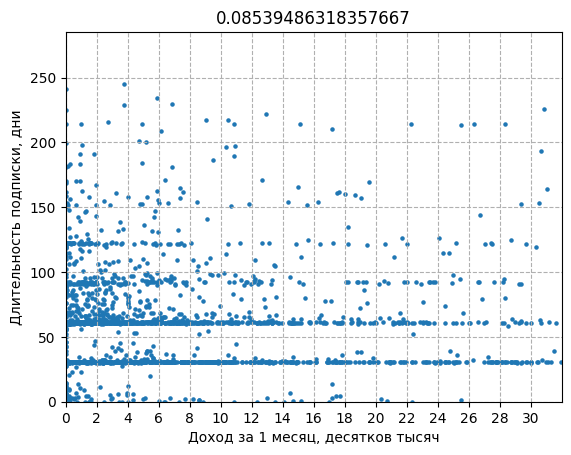

In [8]:
x,y = df_no_active['in_total_1ms_amt'] / 10**4, df_no_active['subscription_time'] / (3600*24)
plt.scatter(x = x, y = y, s = 5)
plt.axis([0, 32, 0, y.max()+10])
plt.grid(linestyle = '--')
plt.ylabel('Длительность подписки, дни')
plt.xlabel('Доход за 1 месяц, десятков тысяч')
plt.title(x.corr(y))
plt.xticks(np.arange(0, 32, 2))
plt.show()

In [9]:
df_1 = df_no_active[df_no_active['subscription_time'] <= 35*24*3600]
df_2 = df_no_active[(df_no_active['subscription_time'] >= 35*24*3600) & (df_no_active['subscription_time'] < 65*24*3600)]
df_3 = df_no_active[(df_no_active['subscription_time'] >= 65*24*3600) & (df_no_active['subscription_time'] < 95*24*3600)]
df_4 = df_no_active[df_no_active['subscription_time'] >= 95*24*3600]
print(df_1['in_total_1ms_amt'].median(), df_2['in_total_1ms_amt'].median(), df_3['in_total_1ms_amt'].median(), df_4['in_total_1ms_amt'].median())
print(df_1.shape[0], df_2.shape[0], df_3.shape[0], df_4.shape[0])

31713.434999999998 253.45 48240.79 67521.43
1296 2133 366 353


In [50]:
df = df_source.copy()

In [51]:
print(df['trial_type'].unique())
trial = {i: int(i[0]) for i in df['trial_type'].unique()[1:]}
trial[np.nan] = 0
df['trial_type'] = df['trial_type'].transform(lambda x: trial[x])
print(df['trial_type'].value_counts())

[nan '1 mon' '3 mons' '2 mons' '5 mons' '4 mons' '6 mons']
1    43287
0    30359
2       37
3       16
5        7
4        4
6        2
Name: trial_type, dtype: int64


In [52]:
age = {
    'Пусто': 0,
    np.nan: 0,
    '0-13': 13/2,
    '14-17': (14+17)/2, '18-22': (18+22)/2,
    '23-25': (23+25)/2, '26-30': (26+30)/2,
    '31-35': (31+35)/2, '36-40': (36+40)/2,
    '41-45': (41+45)/2, '46-50': (46+50)/2,
    '51-55': (51+55)/2, '56-60': (56+60)/2,
    '61-65': (61+65)/2, '65+':   (65+100)/2,
}
df['age_segment'] = df['age_segment'].transform(lambda x: age[x])

count    0.0
mean     1.0
std      1.0
min      0.0
25%      1.0
50%      2.0
75%      2.0
max      9.0
Name: subscription_time, dtype: float64


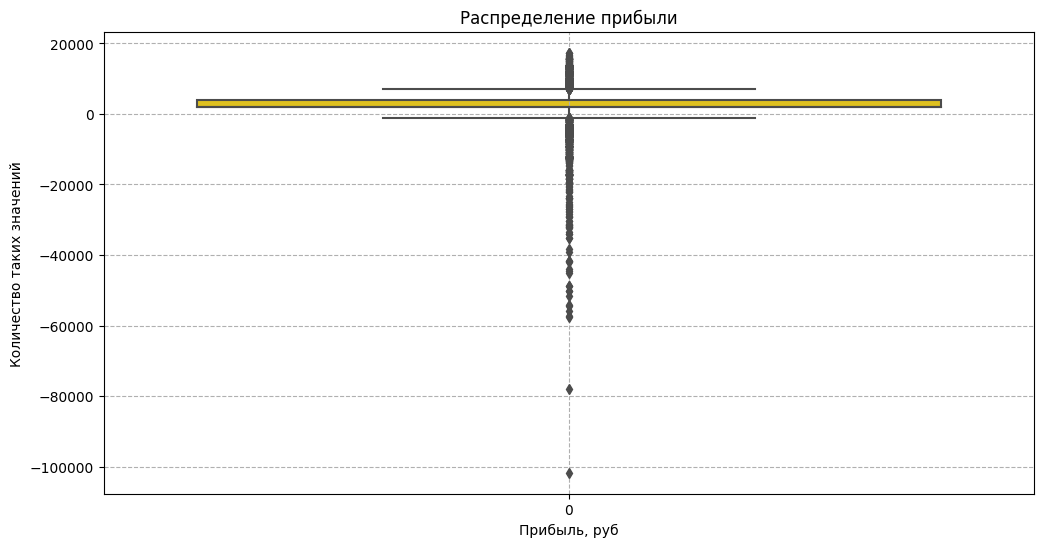

In [85]:
df = df[(df['dep_account_first_open_dt'].isna()) & (df['cln_account_first_open_dt'].isna()) & (df['subscription_time'] > 0)].reset_index().drop(columns = ['index'])
df['income_base'] = 2000 * (df['subscription_time'] // (3600*24*30)+1 - df['trial_type'])
df['normal_wage'] = (df['in_total_5ms_amt']-df['out_total_5ms_amt'])/5
df['normal_wage'] = df['normal_wage'].transform(lambda x: 0 if x < 0 else x)
df['outcome'] = df['percent_flg']*0.03*df['normal_wage'] + df['car_ins_flg']*3000 + df['invest_flg']*0.05*0.01*df['normal_wage'] + 0.03*0.03*df['out_total_5ms_amt']/5 + df['concierge_flg']*7000 + df['vzr_flg']*2500 + df['inkas_flg']*1500 + df['lk_flg']*3000
df['PR'] = df['income_base'] - df['outcome']*(df['subscription_time'] // (3600*24*30)+1)
print(df['subscription_time'].describe() // (3600*24*30))
sns.boxplot(df['PR'], color = 'gold')
plt.title('Распределение прибыли')
plt.xlabel('Прибыль, руб')
plt.ylabel('Количество таких значений')
plt.grid(linestyle = '--')
plt.show()

In [40]:
df['idx_active_usage'] = 0
adv = ['lk_flg', 'inkas_flg', 'cash_out_flg',
          'vzr_flg', 'concierge_flg', 'cb_flg',
          'invest_flg', 'out_c2c_flg', 'car_ins_flg', 'percent_flg']
for i in adv:
        df['idx_active_usage'] += df[i]

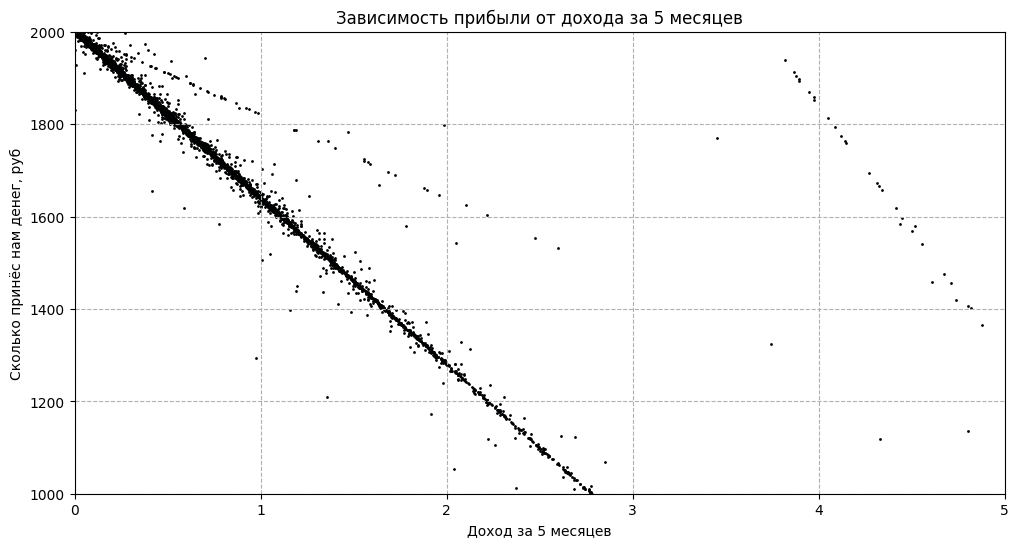

In [61]:
plt.rcParams['figure.figsize'] = [12,6]
plt.title('Зависимость прибыли от дохода за 5 месяцев')
plt.scatter(y = df['PR'], x = df['in_total_5ms_amt'] / 10**6, s = 1, edgecolors = 'black')
plt.axis([0,5, 1000, 2000])
plt.ylabel('Сколько принёс нам денег, руб')
plt.xlabel('Доход за 5 месяцев')
plt.grid(linestyle = '--')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [12,12]
datas = {age: {region: df[(df['age_segment'] == age) & (df['region_size'] == region)] for region in df['region_size'].unique()} for age in df['age_segment'].unique()}
for key1 in datas.keys():
    print(key1)
    i = 1
    for key2 in datas[key1].keys():
        plt.subplot(4,4,i)
        plt.title(key2)
        plt.scatter(x = datas[key1][key2]['in_total_5ms_amt'], y = datas[key1][key2]['PR'], s = 1)
        plt.grid(linestyle = '--')
        i += 1
    plt.show()

In [17]:
df = df[df['PR'] > 0]
location = {
    'МОСКВА': 6,
    'САНКТ-ПЕТЕРБУРГ': 5,
    'ГОРОД-МИЛЛИОННИК': 4,
    'ГОРОД': 3,
    'ПОСЕЛОК ГОРОДСКОГО ТИПА': 2,
    'СЕЛО': 1,
    'ПОСЕЛОК': 0,
    'ДЕРЕВНЯ': 0,
    'неизвестно': 2,
    np.nan: 2}
model = LinearRegression()
X = df[['in_total_5ms_amt', 'age_segment', 'region_size', 'idx_active_usage']+adv]
X['region_size'] = X['region_size'].transform(lambda x: location[x])
model.fit(X, df['PR'])
print(mape(model.predict(X), df['PR']))
print(model.coef_)

0.3963489741094352
[-8.91799039e-05  7.94460733e+00 -2.41204250e+01  3.49689721e+02
 -1.62035596e+02  0.00000000e+00  1.16558114e+03 -4.93458701e+02
 -1.60589921e+01  9.71251789e+02 -2.74070424e+02  3.31386816e+02
 -1.10004712e+03 -7.28591925e+01]


<ipython-input-17-22173ff22e31>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['region_size'] = X['region_size'].transform(lambda x: location[x])


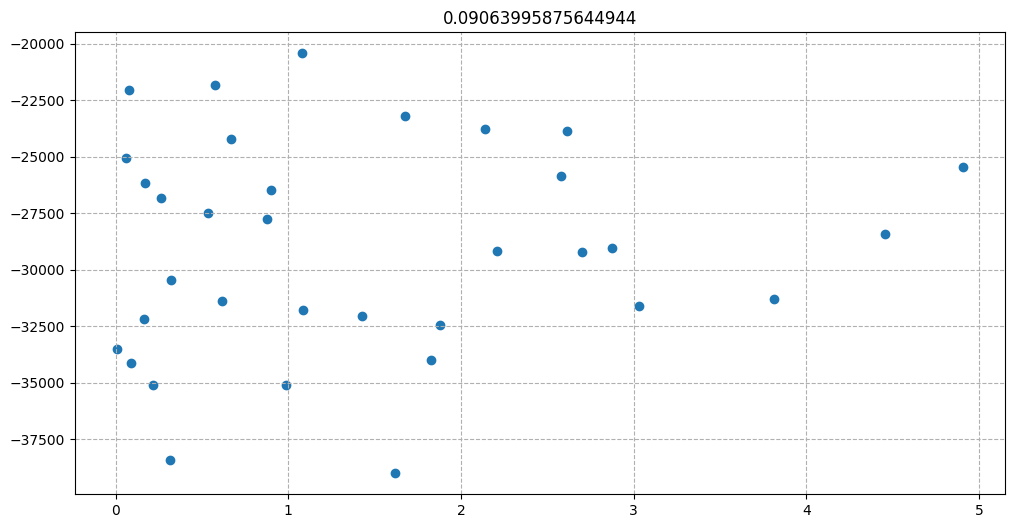

In [79]:
df_group = df[(df['PR'] > -40000) & (df['PR'] < -20000) & (df['in_total_5ms_amt']/10**6 <= 5)]
df_group['age_segment'].value_counts()
plt.scatter(df_group['in_total_5ms_amt']/10**6, df_group['PR'])
plt.title(df['PR'].corr(df_group['in_total_5ms_amt'] / 5))
plt.grid(linestyle = '--')
plt.show()

In [87]:
df_group['region_size'].value_counts()

ГОРОД               18
МОСКВА               6
неизвестно           5
ГОРОД-МИЛЛИОННИК     2
САНКТ-ПЕТЕРБУРГ      1
ПОСЕЛОК              1
СЕЛО                 1
Name: region_size, dtype: int64

count    15758.00
mean         5.45
std        116.04
min         -0.00
25%          0.00
50%          0.00
75%          0.00
max       2521.89
dtype: float64


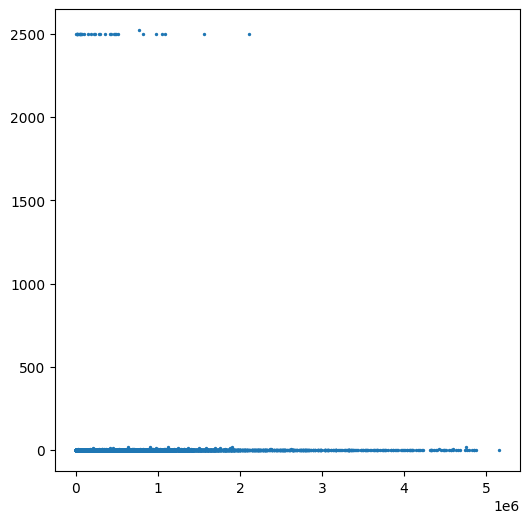

In [20]:
plt.rcParams['figure.figsize'] = [6,6]
y = df_group['outcome'] - 0.03*0.03*df_group['out_total_5ms_amt']/5 - df_group['percent_flg']*0.03*df_group['normal_wage']
print(y.describe().round(2))
plt.scatter(x = df_group['out_total_5ms_amt'], y = y, s = 2)
plt.show()

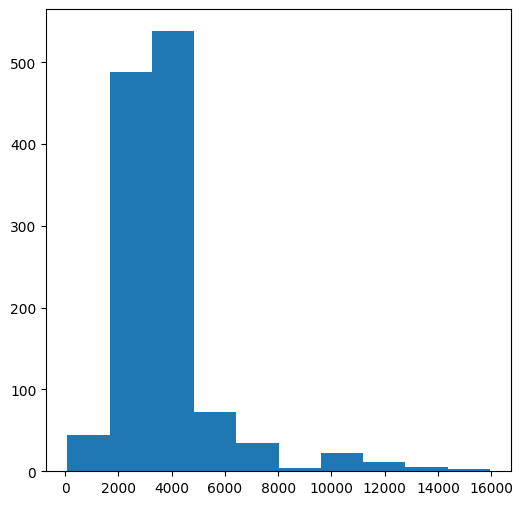

In [21]:
df_test = df[(df['age_segment'] == 33) & (df['region_size'] == 'ГОРОД')]
plt.hist(df_test['PR'])
plt.show()

In [218]:
datas = {}
min_len = 10000000
plot = {}
for region in df['region_size'].unique()[1:]:
    for age in df['age_segment'].unique():
        if not(age in [0.0, 6.5]) and type(region) == str:
            datas[region+' '+str(age)] = df['PR'][(df['age_segment'] == age) & (df['region_size'] == region)].sort_values()
            if datas[region+' '+str(age)].shape[0] < 100:
                datas.pop(region+' '+str(age))
                continue
            min_len = min(min_len, datas[region+' '+str(age)].shape[0])
            print(region, age, datas[region+' '+str(age)].shape[0], variance(datas[region+' '+str(age)])/datas[region+' '+str(age)].mean())
dt = []
kt = []
for key in datas.keys():
    val = variance(datas[key][:min_len])/abs(datas[key][:min_len].mean())
    if val > 5000 and val < 75000:
        plot[key] = val
        kt += [key]
        dt += [datas[key][:min_len]]
print(len(kt), len(dt))

ГОРОД 15.5 1661 1756.2852654062222
ГОРОД 38.0 950 5951.101506763025
ГОРОД 20.0 3346 2635.238546411841
ГОРОД 28.0 1562 4006.555591718405
ГОРОД 58.0 112 2070.3571013515616
ГОРОД 33.0 1293 3935.181208082397
ГОРОД 53.0 181 1616.1769485177313
ГОРОД 24.0 1033 2982.2256510493535
ГОРОД 48.0 335 1888.7991781824867
ГОРОД 43.0 617 3777.5928171069568
ПОСЕЛОК ГОРОДСКОГО ТИПА 15.5 113 1057.1428122256511
ПОСЕЛОК ГОРОДСКОГО ТИПА 20.0 225 942.4168348520957
ПОСЕЛОК ГОРОДСКОГО ТИПА 28.0 121 1551.6592423885531
ПОСЕЛОК ГОРОДСКОГО ТИПА 24.0 108 2677.0512284528795
МОСКВА 15.5 236 4212.391374434469
МОСКВА 38.0 120 16849.13727402626
МОСКВА 20.0 551 8124.803423121829
МОСКВА 28.0 269 10016.822140266482
МОСКВА 33.0 198 11920.894268502369
МОСКВА 24.0 223 5055.494422714259
СЕЛО 15.5 219 1011.8213520264994
СЕЛО 38.0 121 1366.1830469668157
СЕЛО 20.0 603 1398.7219648027065
СЕЛО 28.0 294 2893.551992009944
СЕЛО 33.0 240 1738.3637989056347
СЕЛО 24.0 185 1122.6595825997092
ПОСЕЛОК 15.5 161 1883.5000827974038
ПОСЕЛОК 38.0 

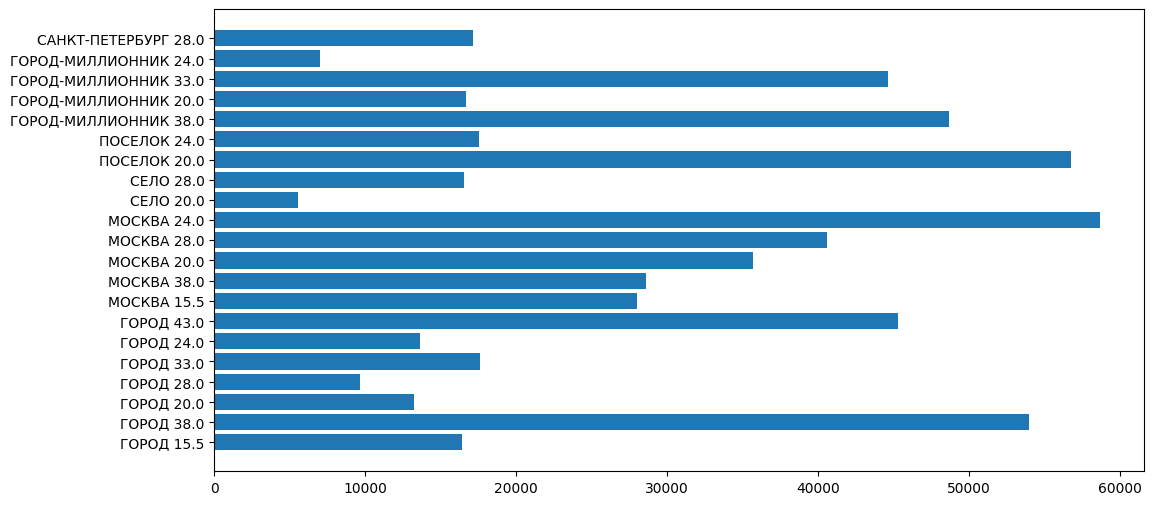

In [182]:
plt.barh(list(plot.keys()), list(plot.values()))
plt.show()

In [222]:
i = 0
print(len(dt))
while len(dt) > 2:
    buf_dt = []
    buf_keys = []
    for i in range(len(dt)):
        for j in range(len(dt)):
            test = scipy.stats.ttest_ind(dt[i],dt[j])
            if test[1] > 0.05:
                print(test[1], 'equal')
            else:
                print(test[1], end = ' ')
                if dt[i].mean() > dt[j].mean() and not(kt[i] in buf_keys):
                    print(kt[i])
                    buf_dt += [dt[i]]
                    buf_keys += [kt[i]]
                elif dt[i].mean() <= dt[j].mean() and not(kt[j] in buf_keys):
                    print(len(kt), len(dt), j)
                    print(kt[j])
                    buf_dt += [dt[j]]
                    buf_keys += [kt[j]]
    print('UPDATE')
    print(buf_keys)
    dt = buf_dt
    kt = buf_keys


21
1.0 equal
0.8455921673956677 equal
0.0004668312419515114 ГОРОД 15.5
0.00016619918737610024 0.09814465462233528 equal
0.7210920093770019 equal
0.16593489716417434 equal
0.0006763037555126644 21 21 7
МОСКВА 15.5
0.00018540213214842446 21 21 8
МОСКВА 38.0
0.911160784070583 equal
0.29079770188133053 equal
0.0023075605649243635 21 21 11
МОСКВА 24.0
3.825846097603439e-06 21 21 12
СЕЛО 20.0
0.00013364660194298454 21 21 13
СЕЛО 28.0
0.002963673167971393 21 21 14
ПОСЕЛОК 20.0
1.1554397319478833e-05 21 21 15
ПОСЕЛОК 24.0
0.002040774627640757 21 21 16
ГОРОД-МИЛЛИОННИК 38.0
0.20093005539590716 equal
0.015849490778316395 21 21 18
ГОРОД-МИЛЛИОННИК 33.0
2.707945702011553e-05 21 21 19
ГОРОД-МИЛЛИОННИК 24.0
4.279687201486247e-06 21 21 20
САНКТ-ПЕТЕРБУРГ 28.0
0.8455921673956677 equal
1.0 equal
0.013722204036124347 ГОРОД 38.0
0.011997628674676368 0.3049097698596356 equal
0.9716577094419603 equal
0.2682936472604403 equal
0.026376580765949568 0.006007242800708814 0.9286363515771023 equal
0.3664021920656